In [1]:
# 필요한 패키지 가져오기

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
abalone_columns=list()
for l in open('data/abalone_attributes.txt'):
    abalone_columns.append(l.strip())

abalone_columns    

data = pd.read_csv('data/abalone.txt',header=None, names=abalone_columns)

In [3]:
label=data['Sex']

In [6]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
data.shape

(4177, 9)

In [8]:
del data['Sex'] #성별데이터 삭제, del,drop 차이 확인해보기

In [9]:
data.head() #간단히 데이터 확인하기용

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
data.describe() #데이터 총 갯수 확인하는용

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [12]:
data=(data-np.min(data))/(np.max(data)-np.min(data)) #민맥스데이터->'Rings'스케일링하기

In [13]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
mMscaler = MinMaxScaler()

In [16]:
#mMscaler.fit(data) #데이터를 가져다 붙이는 명령어_fit

In [17]:
#mMscaled_data = mMscaler.transform(data) #실제로 변환시키기

In [18]:
#fit,transform 을 한번에
mMscaled_data = mMscaler.fit_transform(data)

In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [21]:
sdscaled_data = sdscaler.fit_transform(data)

In [22]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [24]:
#!pip install imblearn #'!'는 리눅스 명령어_설치용

In [25]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [26]:
data.shape

(4177, 8)

In [28]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [29]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.493243,0.478992,0.092920,0.129981,0.109617,0.104674,0.099651,0.142857
4580,0.391892,0.361345,0.075221,0.071897,0.051782,0.063199,0.068261,0.214286
4581,0.304054,0.277311,0.057522,0.043032,0.039005,0.033575,0.029895,0.142857
4582,0.195946,0.184874,0.048673,0.018594,0.013786,0.015142,0.018435,0.142857


In [31]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [33]:
undersampled_data.shape

(3921, 8)

In [34]:
from sklearn.datasets import make_classification
data, label = make_classification(n_samples=1000,
    n_classes=3,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05,0.15,0.8],
    class_sep=0.8,
    random_state=2022)

In [35]:
data.shape

(1000, 2)

In [36]:
data

array([[-1.91117507,  0.90864868],
       [ 0.23908554, -1.9966176 ],
       [ 0.41063734, -1.09651695],
       ...,
       [-0.74729639, -1.06505046],
       [ 0.78391513, -1.6661851 ],
       [-0.04871935,  2.48764856]])

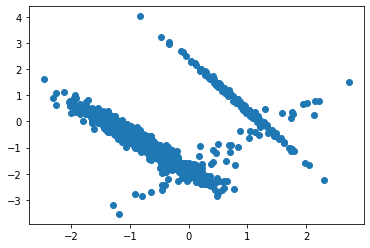

In [37]:
plt.scatter(data[:,0],data[:,1])

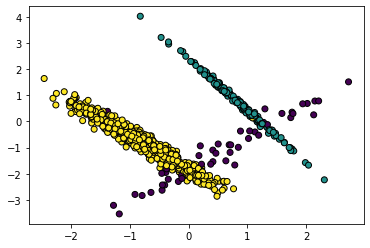

In [38]:
plt.scatter(data[:,0], data[:,1],c=label, linewidth=1, edgecolor='black')

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)

In [43]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [44]:
data.shape

(1000, 2)

In [46]:
smoted_data.shape

(2382, 2)

In [47]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


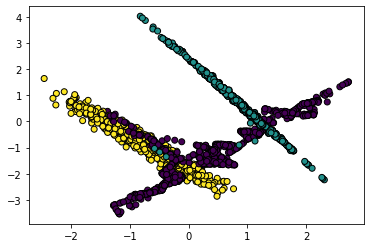

In [49]:
plt.scatter(smoted_data[:,0],smoted_data[:,1],
           c=smoted_label, linewidths=1, edgecolors='black')

In [50]:
from sklearn.datasets import load_digits

In [51]:
digits = load_digits()

In [52]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [54]:
digits.data.shape

(1797, 64)

In [55]:
data = digits.data
label = digits.target

In [56]:
data[0].reshape(8,8) #0인 데이터들

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Label : 0


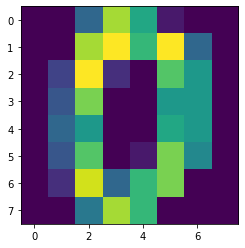

In [58]:
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [61]:
new_data = pca.fit_transform(data)

In [62]:
data.shape

(1797, 64)

In [63]:
new_data.shape

(1797, 2)

In [64]:
new_data[0]

array([-1.25946833, 21.27488185])

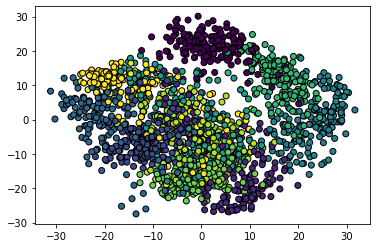

In [68]:
plt.scatter(new_data[:,0],new_data[:,1],c=label,linewidths=1,edgecolors='black')

In [69]:
data=pd.read_csv('data/abalone.txt',header=None, names=abalone_columns)

In [70]:
label = data['Sex']

In [71]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
label_encoded_label = le.fit_transform(label)

In [74]:
label_encoded_label #숫자로 다바뀜

array([2, 2, 0, ..., 2, 0, 2])

In [75]:
result = pd.DataFrame(data = 
                      np.concatenate([label.values.reshape((-1,1)), 
                      label_encoded_label.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])

In [76]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) #배열로 받기위해서 Flase로 쓰기

In [81]:
one_hot_encoded = ohe.fit_transform(label.values.reshape(-1,1))

In [82]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [83]:
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [84]:
from sklearn.datasets import load_wine
wine = load_wine()

In [85]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [86]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [87]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [88]:
data.shape

(178, 13)

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [90]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [92]:
data.shape

(178, 2)

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [94]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [95]:
cluster = kmeans.predict(data)

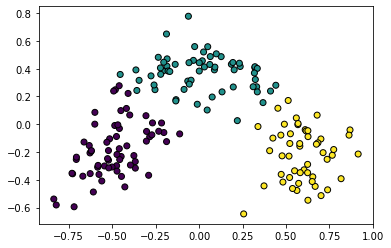

In [96]:
plt.scatter(data[:,0],data[:,1],c=cluster,
            linewidth=1, edgecolor='black')

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 6.4 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f0f533e48e9cfbdcb429d7bfe5d4cc5c78618aca199f3113fda9de308015c129
  Stored in directory: /Users/jaunnnngspc/Library/Caches/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(26, 2)


/Users/jaunnnngspc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


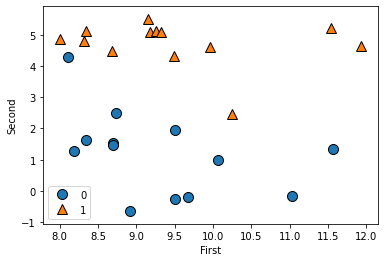

In [9]:
# 지도 학습 알고리즘
import mglearn
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('First')
plt.ylabel('Second')
plt.legend()
print(X.shape)

(40, 1)


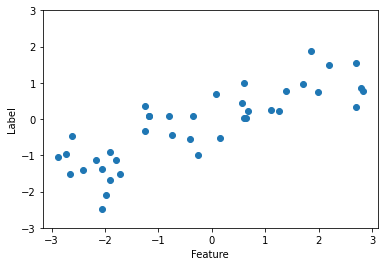

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X,y,'o')
plt.ylim(-3,3)

plt.xlabel('Feature')
plt.ylabel('Label')
print(X.shape)

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
cancer.data.shape

(569, 30)

In [13]:
#cancer.target.    #malignant #benign
#cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')